# Lending Club Case Study:

Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return. 

### Problem Statement
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

### Buisiness Objectives
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilize this knowledge for its portfolio and risk assessment. 

#### Scope of the Case study : 
Scope is to identify patterns that indicates whether an applicant is likely to default or not . Based on that Lending Club/Investor can take timely decision.

##### Methodology
 - Using the Exploratory Data analysis method to find the insights from the available data  , find the correlations and deciding factors which decides wether the applicant is likely to default or not. Based on this assessement outcome company can measure those in-advance before approving or rejecting it. 
 - This will address their problem statements mentioned and also can meet their objectives
 
### This case study mainly divided in to 4 phases : 
1. Data understanding
2. Data cleaning which involves 
3. Data Analysis 
4. Recommendations    

#### Contributors to this case study
     - Joshy PJ
     - Sheetal R

# 1. Data understanding
 - In this stage visually reviewing the data , correlating with its metadata available against the columns , identifying the tools can be used for this excercise

In [1]:
#Importing all the necessary modules which helps in analysing the data using Python 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import datetime 

## Loading the dataset for the review

In [2]:
#Loading the data to panda's data frame and viewring the data at high level
loan_data = pd.read_csv('loan.csv',low_memory=False, dtype='unicode')
# First 5 records of the dataset
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [3]:
# looking for the number of columns , row count , uniqueue values and its frequency to get some insight in to the data frame
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,0,0,0,0,39020,39678,0,0,0,0
unique,39717,39717,885,1041,8205,2,371,15383,7,35,...,0,0,0,0,3,1,0,0,0,0
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,B3,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,...,NaN,NaN,NaN,NaN,37339,39678,NaN,NaN,NaN,NaN


## Shape of the data set

In [4]:
#checking the shape of the dataset - which shows the number of rows and columns in the dataset
loan_data.shape

(39717, 111)

## Basic information of the data set , data integrity across the columns

In [5]:
# Checking the data as a whole , looking for number entries and null values
# There are some columns with full null values,  and other rows also has some null values
loan_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    id                              39717 non-null  object
 1    member_id                       39717 non-null  object
 2    loan_amnt                       39717 non-null  object
 3    funded_amnt                     39717 non-null  object
 4    funded_amnt_inv                 39717 non-null  object
 5    term                            39717 non-null  object
 6    int_rate                        39717 non-null  object
 7    installment                     39717 non-null  object
 8    grade                           39717 non-null  object
 9    sub_grade                       39717 non-null  object
 10   emp_title                       37258 non-null  object
 11   emp_length                      38642 non-null  object
 12   home_ownership                

## List of columns and its attributes

In [6]:
# the list of columns in the data set - reviewing the columns and correlating it with its metadata. Based on this 
# one can decide which columns to be focused more
set(loan_data)

{'acc_now_delinq',
 'acc_open_past_24mths',
 'addr_state',
 'all_util',
 'annual_inc',
 'annual_inc_joint',
 'application_type',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'desc',
 'dti',
 'dti_joint',
 'earliest_cr_line',
 'emp_length',
 'emp_title',
 'funded_amnt',
 'funded_amnt_inv',
 'grade',
 'home_ownership',
 'id',
 'il_util',
 'initial_list_status',
 'inq_fi',
 'inq_last_12m',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d',
 'last_credit_pull_d',
 'last_pymnt_amnt',
 'last_pymnt_d',
 'loan_amnt',
 'loan_status',
 'max_bal_bc',
 'member_id',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_

### Initial Insights
 - Based on the intial analsys . this data represents the historical data from lending club , where they served loans for multiple customer profiles and details of their both the customers. 
 - This data talks about Fully Paid , Charged Off and Current loan appliacants.
 - Based on the metadata shared / problem statement,  will be focusing more on the key attributes which decides the defaulter or Fully Paid customers.

# 2. Data Cleaning
- Looking for the null values and  its percentage 
- Methodology for removing those null values 
- Imputing those null values based on the available and buisiness probelems
- Formating the column datatypes based on the data and its meaning

### Looking for the null values and its percentage

In [7]:
# Calculating the percentage of missing values in each column 
pd.set_option('max_rows', None) 
round(loan_data.isnull().sum()/len(loan_data)*100).sort_values(ascending =False)


verification_status_joint         100.0
annual_inc_joint                  100.0
mo_sin_old_rev_tl_op              100.0
mo_sin_old_il_acct                100.0
bc_util                           100.0
bc_open_to_buy                    100.0
avg_cur_bal                       100.0
acc_open_past_24mths              100.0
inq_last_12m                      100.0
total_cu_tl                       100.0
inq_fi                            100.0
total_rev_hi_lim                  100.0
all_util                          100.0
max_bal_bc                        100.0
open_rv_24m                       100.0
open_rv_12m                       100.0
il_util                           100.0
total_bal_il                      100.0
mths_since_rcnt_il                100.0
open_il_24m                       100.0
open_il_12m                       100.0
open_il_6m                        100.0
open_acc_6m                       100.0
tot_cur_bal                       100.0
tot_coll_amt                      100.0


### Based on the above output , there are many columns with null values, some are having no data and this has to be addressed.
 - One approach is drop the null values , if ihe columns has null values more 50% total 

In [8]:
# Deleting the columns with more than 50% missing values by using threshold option. 
# Keeping missing values in the data creates descrepency in the analysis
loan_data = loan_data.dropna(axis=1,thresh=int(len(loan_data.index)/2))

In [9]:
# Percentage of missing values after deleting those columns.
round(loan_data.isnull().sum()/len(loan_data)*100).sort_values(ascending =False)

desc                          33.0
emp_title                      6.0
emp_length                     3.0
pub_rec_bankruptcies           2.0
id                             0.0
total_rec_late_fee             0.0
revol_util                     0.0
total_acc                      0.0
initial_list_status            0.0
out_prncp                      0.0
out_prncp_inv                  0.0
total_pymnt                    0.0
total_pymnt_inv                0.0
total_rec_prncp                0.0
total_rec_int                  0.0
collection_recovery_fee        0.0
recoveries                     0.0
pub_rec                        0.0
last_pymnt_d                   0.0
last_pymnt_amnt                0.0
last_credit_pull_d             0.0
collections_12_mths_ex_med     0.0
policy_code                    0.0
application_type               0.0
acc_now_delinq                 0.0
chargeoff_within_12_mths       0.0
delinq_amnt                    0.0
revol_bal                      0.0
inq_last_6mths      

In [10]:
# close to half of the columns where got dropped because of the null more value percentage
loan_data.shape

(39717, 54)

In [11]:
# Loan description filed is very lengthly and its an input given by the borrower , more precice information of this data available 
# the purpose of the loan. Hence we can drop this column , also it has close to 33% missing values.
loan_data = loan_data.drop(['desc'],axis=1)

#### The objective is to address the new loan application  whether they will be defaulted or not. So the existing customer specific behaviour variables will not make any sense in this analysis. Those patterns specific to those customers. So we can remove those columns from the assessement

In [12]:
# Removing the customer behaviour columns data , which will not help in processing the new application
loan_data = loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)

In [13]:
# close to 11 columns where specific to customer behaviour patterns which is private to the customers.
loan_data.shape

(39717, 32)

### Handling the missing values , if the missing value percentage is very minimal
- Mean/ Mode/ Median Imputation Mean / Mode / Median imputation is one of the most frequently used methods. It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.


In [14]:
## missingno library provides the option to view missing values comparing across all the columns.
## Based on this we can see "emp_title","emp_length","pub_rec_bankruptcies" are columns having the missing values.

<AxesSubplot:>

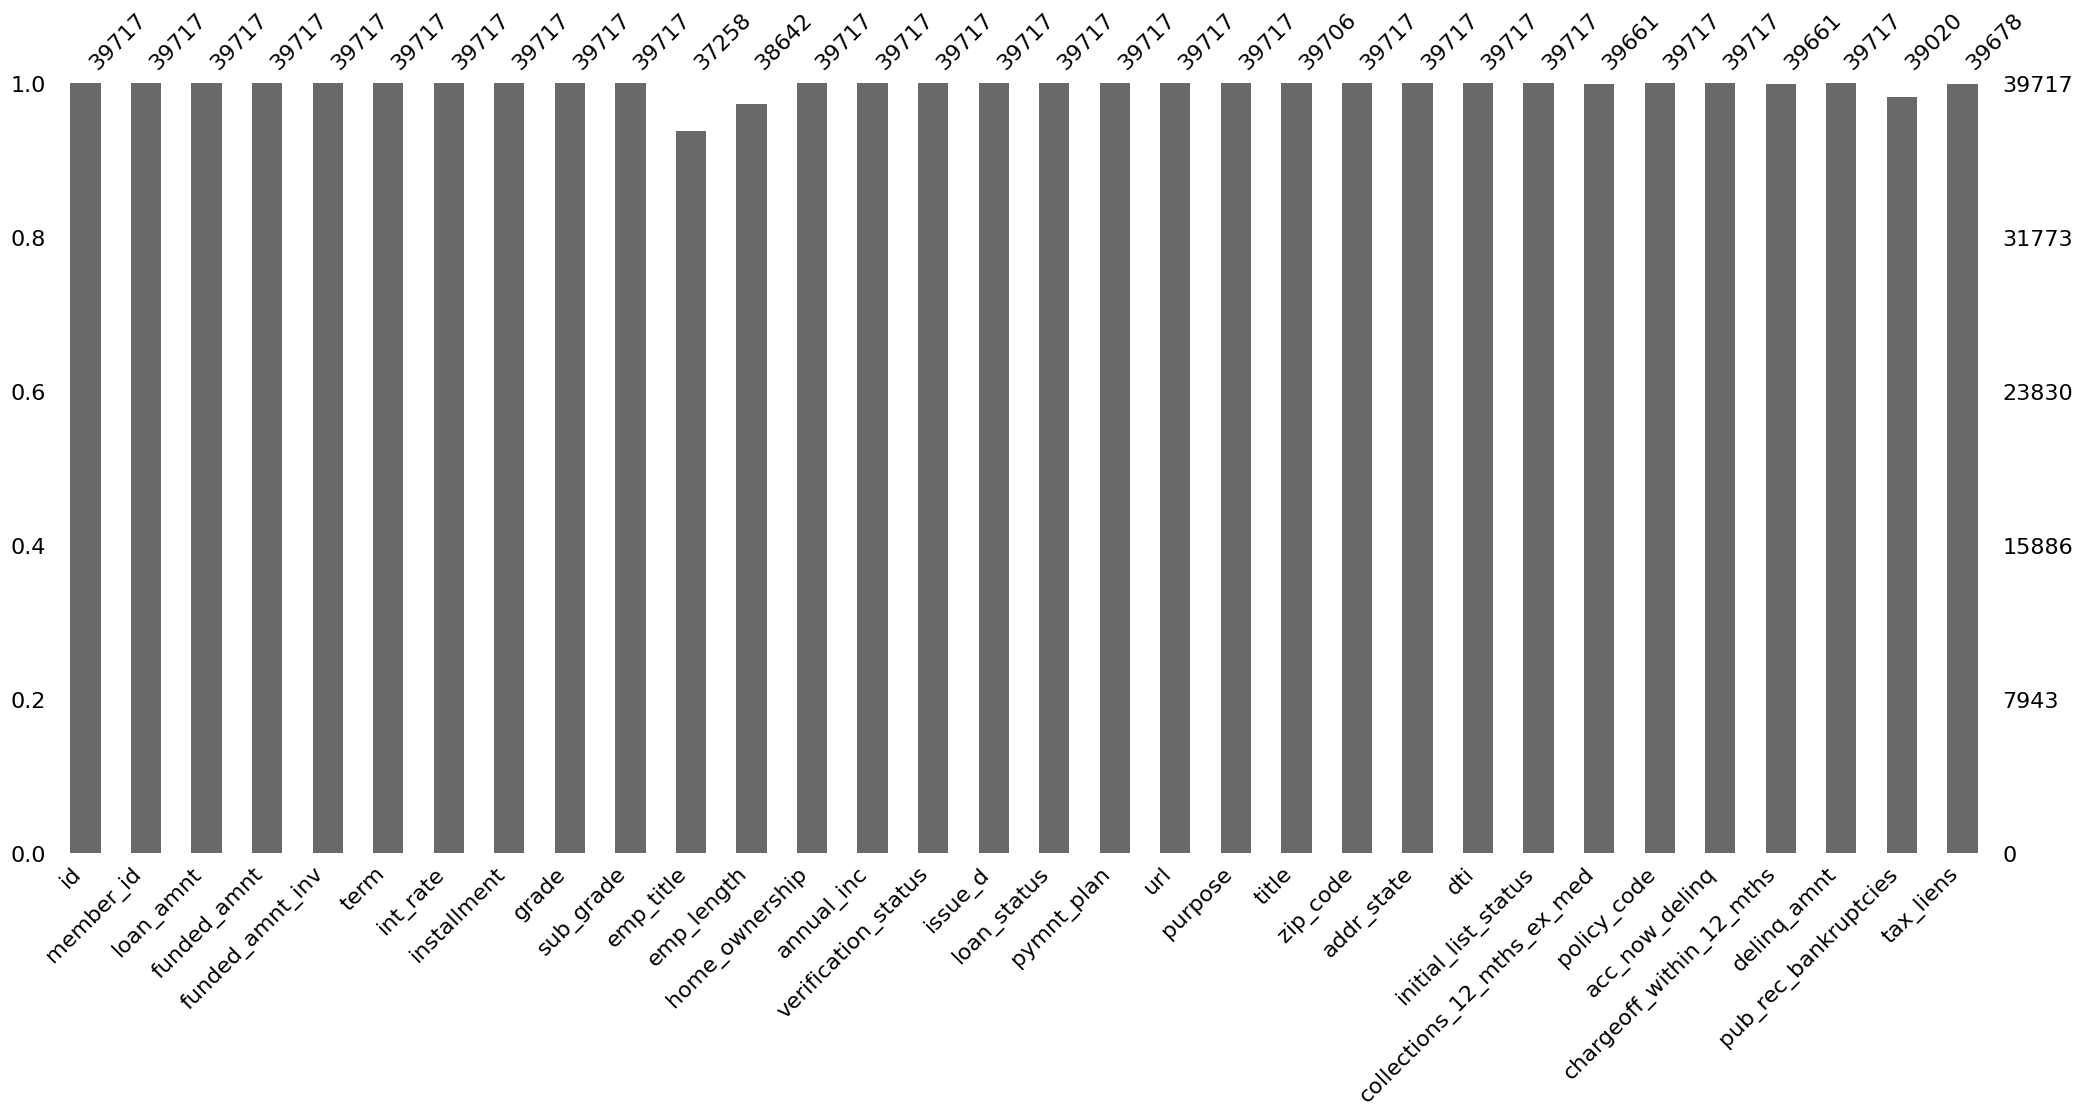

In [15]:
msno.bar(loan_data)

<AxesSubplot:>

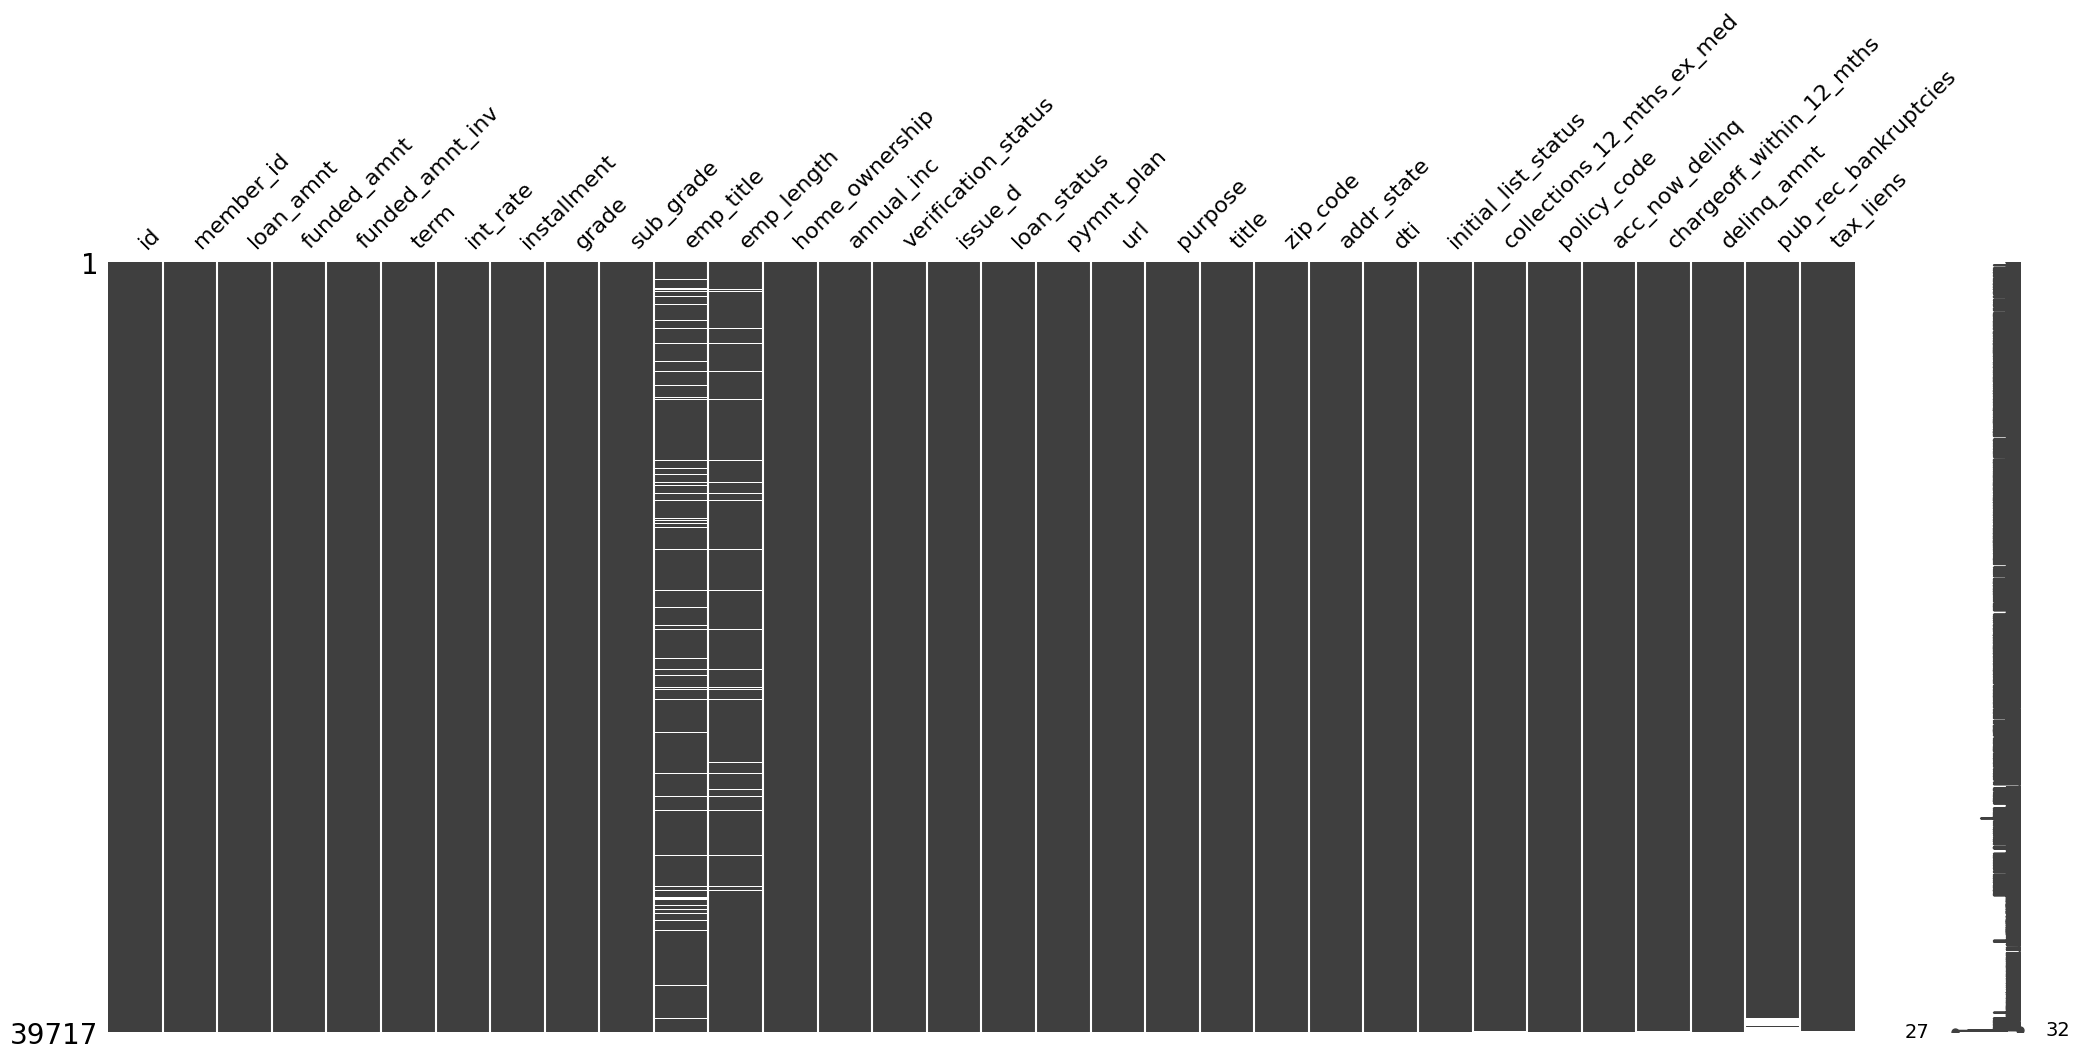

In [16]:
# Missingno metrix showing on which rows missing values are more and is there any correlation with other columns which also has 
# the missing values. Based on this one can decide to drop those rows or inpute some values to make it more fruitfull analysis
msno.matrix(loan_data)

In [17]:
# looking for the sum of missing values in each columns and taking a decision based on the column type and its value patterns
loan_data.isnull().sum().sort_values(ascending =False)

emp_title                     2459
emp_length                    1075
pub_rec_bankruptcies           697
chargeoff_within_12_mths        56
collections_12_mths_ex_med      56
tax_liens                       39
title                           11
purpose                          0
zip_code                         0
addr_state                       0
initial_list_status              0
dti                              0
pymnt_plan                       0
policy_code                      0
acc_now_delinq                   0
delinq_amnt                      0
url                              0
id                               0
member_id                        0
issue_d                          0
verification_status              0
annual_inc                       0
home_ownership                   0
sub_grade                        0
grade                            0
installment                      0
int_rate                         0
term                             0
funded_amnt_inv     

In [18]:
#emp_title columns shows the borrower profile , there are close to 2459 missing values in this column and it will not make any
# sense to impute the data based on the frequency or the mode of this column.
loan_data['emp_title'].value_counts().head()


US Army              134
Bank of America      109
IBM                   66
AT&T                  59
Kaiser Permanente     56
Name: emp_title, dtype: int64

In [19]:
# so its better to drop those rows with missing emp_title - this is a key columns which we can used for the correlation with
#Fully paid vs charged off catogory.
loan_data = loan_data[~loan_data['emp_title'].isna()]

In [20]:
# Emp_length column shows the experience of the borrower , there are 1075 borrower with no experience mentioned.

loan_data['emp_length'].value_counts()

10+ years    8535
2 years      4273
< 1 year     4201
3 years      3982
4 years      3357
5 years      3177
1 year       3134
6 years      2158
7 years      1722
8 years      1435
9 years      1228
Name: emp_length, dtype: int64

In [21]:
# so we cannot inpute this column with mode , this is a key metrix and which can leads to a false interpretation 
loan_data = loan_data[~loan_data['emp_length'].isna()]

In [22]:
loan_data['pub_rec_bankruptcies'].value_counts()

0    35039
1     1502
2        7
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
# pub_rec_bankruptcies shows the number of records against the borrower and this filed 
# based on the data pattern there are 697 missing values of 39717 ,  94% percentage people doesnt have any bankruptcies records.
# so easily we can input 0 against those people who doesnt have records. this will not make much difference in the analysis
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].fillna(0)

In [24]:
loan_data.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                          9
zip_code                       0
addr_state                     0
dti                            0
initial_list_status            0
collections_12_mths_ex_med    47
policy_code                    0
acc_now_delinq                 0
chargeoff_within_12_mths      47
delinq_amnt                    0
pub_rec_ba

In [25]:
#  for the "collections_12_mths_ex_med" , "chargeoff_within_12_mths" and "tax_liens" are having 47 and 32 missing values , we can
#fill them with "NAN" for the initial analysis , later these can be imputed with mode or mean depends up on the initial analysis
#outcome
loan_data['collections_12_mths_ex_med'].value_counts()

0    37155
Name: collections_12_mths_ex_med, dtype: int64

In [26]:
loan_data['chargeoff_within_12_mths'].value_counts()

0    37155
Name: chargeoff_within_12_mths, dtype: int64

In [27]:
loan_data['collections_12_mths_ex_med'] = loan_data['collections_12_mths_ex_med'].fillna("NAN")
loan_data['chargeoff_within_12_mths'] = loan_data['chargeoff_within_12_mths'].fillna("NAN")
loan_data['tax_liens'] = loan_data['tax_liens'].fillna("NAN")

#### Addressed all the missing values with multiple methods . Some are dropped, some are filled with NAN , some can be addressed with mean or mode of the existing values

In [28]:
# Now all the columns having data , which is ready for the next phase.
loan_data.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         9
zip_code                      0
addr_state                    0
dti                           0
initial_list_status           0
collections_12_mths_ex_med    0
policy_code                   0
acc_now_delinq                0
chargeoff_within_12_mths      0
delinq_amnt                   0
pub_rec_bankruptcies          0
tax_lien

In [29]:
# Viewing the data for the columns values and its type
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,GA,1,f,0,1,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,CA,20,f,0,1,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,OR,17.94,f,0,1,0,0,0,0,0
5,1075269,1311441,5000,5000,5000,36 months,7.90%,156.46,A,A4,...,AZ,11.2,f,0,1,0,0,0,0,0
6,1069639,1304742,7000,7000,7000,60 months,15.96%,170.08,C,C5,...,NC,23.51,f,0,1,0,0,0,0,0


## Fixing the column data types
- Based on the column data and its metadata description , we can convert the datatypes of existing columns to the approapriate format.
- used lambda function to convert all the column data into the appropriate dtypes.

In [30]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37202 entries, 1 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          37202 non-null  object
 1   member_id                   37202 non-null  object
 2   loan_amnt                   37202 non-null  object
 3   funded_amnt                 37202 non-null  object
 4   funded_amnt_inv             37202 non-null  object
 5   term                        37202 non-null  object
 6   int_rate                    37202 non-null  object
 7   installment                 37202 non-null  object
 8   grade                       37202 non-null  object
 9   sub_grade                   37202 non-null  object
 10  emp_title                   37202 non-null  object
 11  emp_length                  37202 non-null  object
 12  home_ownership              37202 non-null  object
 13  annual_inc                  37202 non-null  ob

In [31]:
# Converting all the column attributes to its appropriate data types
loan_data['issue_d_year']=loan_data['issue_d'].apply(lambda x:datetime.datetime.strptime(x,'%b-%y').year)
loan_data['issue_d_month']=loan_data['issue_d'].apply(lambda x:datetime.datetime.strptime(x,'%b-%y').month)
loan_data['loan_amnt'] = loan_data['loan_amnt'].apply(lambda x: int(x))
loan_data['funded_amnt'] = loan_data['funded_amnt'].apply(lambda x: int(x))
loan_data['funded_amnt_inv'] = loan_data['funded_amnt_inv'].apply(lambda x: float(x))
loan_data['installment'] = loan_data['installment'].apply(lambda x: float(x))
loan_data['annual_inc'] = loan_data['annual_inc'].apply(lambda x: float(x))
loan_data['dti'] = loan_data['dti'].apply(lambda x: float(x))
loan_data['delinq_amnt'] = loan_data['delinq_amnt'].apply(lambda x: int(x))
loan_data['collections_12_mths_ex_med'] = loan_data['collections_12_mths_ex_med'].apply(lambda x : float(x))
loan_data['pub_rec_bankruptcies'] = loan_data['pub_rec_bankruptcies'].apply(lambda x : float(x))
loan_data['tax_liens'] = loan_data['tax_liens'].apply(lambda x : float(x))
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x : float(x.split('%')[0]))

In [32]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37202 entries, 1 to 39716
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37202 non-null  object 
 1   member_id                   37202 non-null  object 
 2   loan_amnt                   37202 non-null  int64  
 3   funded_amnt                 37202 non-null  int64  
 4   funded_amnt_inv             37202 non-null  float64
 5   term                        37202 non-null  object 
 6   int_rate                    37202 non-null  float64
 7   installment                 37202 non-null  float64
 8   grade                       37202 non-null  object 
 9   sub_grade                   37202 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  37202 non-null  object 
 12  home_ownership              37202 non-null  object 
 13  annual_inc                  372

##   Filetering the data based on the condition
- Current loan details are not needed for analysing defaults and Fully Paid catogories. Hence, droping  the rows that contains loan_status as "Current".
- This can be a seperate analysis to find whether they became defaulters of not based on their emi payment

In [33]:
# Filtering the data based on the condition
loan_data = loan_data[loan_data['loan_status']!="Current"]

The analysis which we have to do based on the 'loan_status' which tells us is it Fully Paid or Charged Off case , based on that
we have to correlate with other characteristics to find the correlation.

Here are the main fields, which will be concentrating through out the analysis to find the relation

- id
- loan_amnt
- funded_amnt
- funded_amnt_inv
- term
- int_rate
- grade
- sub_grade
- emp_title
- emp_length
- home_ownership
- annual_inc
- verification_status
- loan_status
- purpose
- addr_state
- dti
- pub_rec_bankruptcies
- issue_d_month
- issue_d_year

Hence will be concentrating more on these metrixs to get the insights and correlations

In [34]:
# Based on the above selected columns , filtering the data from the existing data frame.

loan_data = loan_data[['id','loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','grade','sub_grade','emp_title','emp_length',
                   'home_ownership','annual_inc','verification_status','loan_status','purpose','addr_state',
                   'dti','pub_rec_bankruptcies','issue_d_month','issue_d_year']]

In [35]:
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year
1,1077430,2500,2500,2500.0,60 months,15.27,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0.0,12,2011
3,1076863,10000,10000,10000.0,36 months,13.49,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0.0,12,2011
5,1075269,5000,5000,5000.0,36 months,7.90,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0.0,12,2011
6,1069639,7000,7000,7000.0,60 months,15.96,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,NC,23.51,0.0,12,2011
7,1072053,3000,3000,3000.0,36 months,18.64,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Fully Paid,car,CA,5.35,0.0,12,2011


In [36]:
# Shape of the dataframe after filtering columns
loan_data.shape

(36136, 20)

## Filtering the columns based on the outliers

<AxesSubplot:>

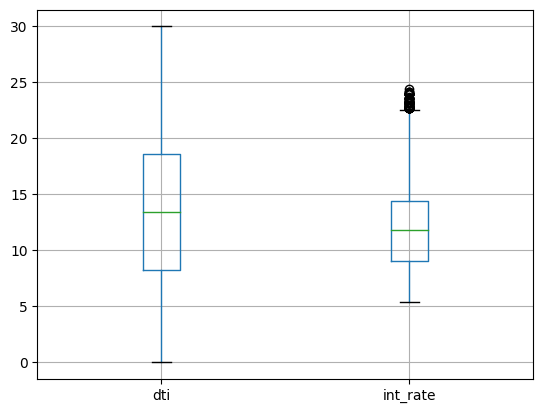

In [37]:
# Boxplot of 'dti' and 'int_rate' to check for outliers

loan_data.boxplot(column=['dti','int_rate']) 

#### Upper and loawer quartiles are clearly visible and some extreme values are present in the upper whisker

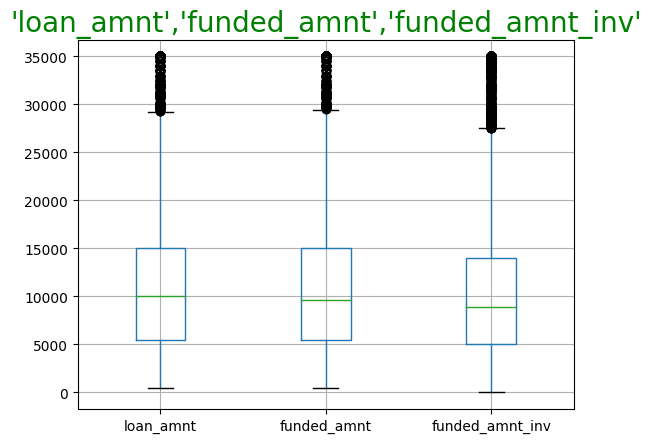

In [38]:
# Boxplot of 'loan_amnt' ,'funded_amnt' and 'funded_amnt_inv' to check for outliers

loan_data.boxplot(column=['loan_amnt','funded_amnt','funded_amnt_inv']) 
plt.title("'loan_amnt','funded_amnt','funded_amnt_inv'", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Upper and loawer quartiles are clearly visible and all are following the same pattern

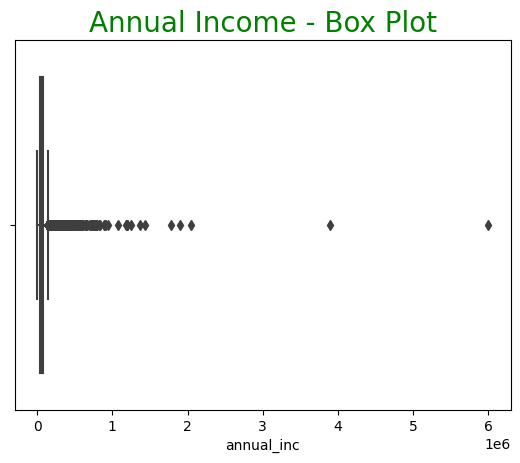

In [39]:
# SNS Boxplot of 'annual_inc' to check for outliers

sns.boxplot(x= 'annual_inc',data = loan_data) 
plt.title("Annual Income - Box Plot", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Upper and lower quartiles are not clearly visible because of some outliers which needs to be indetified and filtered

In [40]:
# Checking outliers in annual_inc

loan_data['annual_inc'].describe()

count    3.613600e+04
mean     6.903275e+04
std      6.462191e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [41]:
#There is a huge gap between 75th percentile and the max velue.

print(" 80%, annual income =",loan_data['annual_inc'].quantile(0.80))
print(" 90%, annual income =",loan_data['annual_inc'].quantile(0.90))
print(" 95%, annual income =",loan_data['annual_inc'].quantile(0.95))
print(" 99%, annual income =",loan_data['annual_inc'].quantile(0.99))
print(" 100%, annual income =",loan_data['annual_inc'].quantile(1.00))

 80%, annual income = 90000.0
 90%, annual income = 115000.0
 95%, annual income = 140000.0
 99%, annual income = 230000.0
 100%, annual income = 6000000.0


In [42]:
# 99% percentile value is 230000 and 100% pecentile is 6000000.0 , so there is huge gap between these two , so drop those outtliers

loan_data = loan_data[~(loan_data['annual_inc']>230000)]

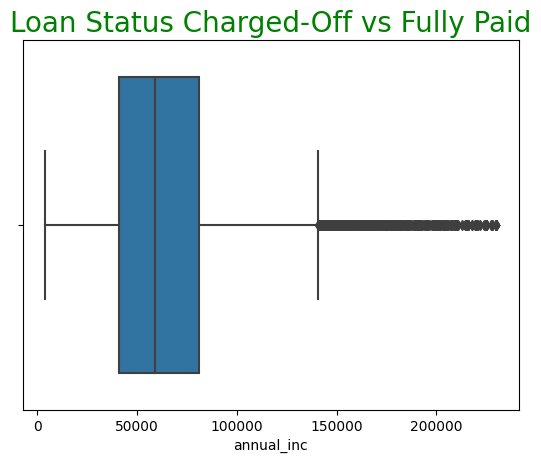

In [43]:
# SNS Boxplot of 'annual_inc' after removal of outliers

sns.boxplot(x= 'annual_inc',data = loan_data) 
plt.title("Loan Status Charged-Off vs Fully Paid", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

###  Binning of continous variables
- Creating bins in continous variables will make sense to find the correlation in each buckets.
- Here based on the available data , multiple quantiative variables can be selected for the binning purpose like
   - dti
   - annual_income
   - int_rate
   - loan_amount
  Describing of each varible provides a view around these variables and based on that we can do the binning.


In [44]:
loan_data['dti'].describe()

count    35781.000000
mean        13.412951
std          6.631328
min          0.000000
25%          8.340000
50%         13.520000
75%         18.650000
max         29.990000
Name: dti, dtype: float64

In [45]:
loan_data['int_rate'].describe()

count    35781.000000
mean        11.954006
std          3.677521
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [46]:
loan_data['loan_amnt'].describe()

count    35781.000000
mean     11023.413264
std       7238.108124
min        500.000000
25%       5500.000000
50%       9800.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [47]:
loan_data['annual_inc'].describe()

count     35781.000000
mean      65609.124719
std       34535.483814
min        4000.000000
25%       41000.000000
50%       59000.000000
75%       80952.000000
max      230000.000000
Name: annual_inc, dtype: float64

In [48]:
loan_data['annual_inc_bins'] = pd.cut(x=loan_data['annual_inc'], bins=[0,10000,25000,50000,100000,150000,200000,250000],labels=['10K','25K','50K','100K','150K','200K','250K'])
loan_data['loan_amnt_bins'] = pd.cut(x=loan_data['loan_amnt'], bins=[0,5000,10000,15000,20000,25000,30000,35000],labels=['5K','10K','15K','20K','25K','30K','35K'])
loan_data['dti_bins'] = pd.cut(x=loan_data['dti'], bins=[0,5,10,15,20,25,30],labels=[5,10,15,20,25,30])
loan_data['int_rate_bins'] = pd.cut(x=loan_data['int_rate'], bins=[5,10,15,20,25],labels=['5-10','10-15','15-20','20-25'])

In [49]:
loan_data['annual_inc_bins'].value_counts()

100K    16922
50K     11970
150K     3774
25K      2069
200K      830
250K      154
10K        62
Name: annual_inc_bins, dtype: int64

In [50]:
loan_data['dti_bins'].value_counts()

15    9002
20    8305
10    7186
25    6239
5     4315
30     574
Name: dti_bins, dtype: int64

In [51]:
# 4 bins/categories of 'int_rate' is created

loan_data['int_rate_bins'].value_counts()

10-15    17043
5-10     11292
15-20     6740
20-25      706
Name: int_rate_bins, dtype: int64

In [52]:
loan_data['loan_amnt_bins'].value_counts()

10K    11959
5K      8636
15K     7266
20K     4091
25K     2574
30K      637
35K      618
Name: loan_amnt_bins, dtype: int64

### Adding new column based on the loan_status 
- 0 if Fully Paid
- 1 if Charged Off

In [53]:
loan_data['loan_outcome'] = loan_data['loan_status'].apply(lambda x : 0 if x == "Fully Paid" else 1)

### Completed the data loading , cleaning, filtering and binning , next phase is to perform the analysis

In [54]:
# First 5 records of the dataframe ready for analysis

loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,...,addr_state,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year,annual_inc_bins,loan_amnt_bins,dti_bins,int_rate_bins,loan_outcome
1,1077430,2500,2500,2500.0,60 months,15.27,C,C4,Ryder,< 1 year,...,GA,1.00,0.0,12,2011,50K,5K,5,15-20,1
3,1076863,10000,10000,10000.0,36 months,13.49,C,C1,AIR RESOURCES BOARD,10+ years,...,CA,20.00,0.0,12,2011,50K,10K,20,10-15,0
5,1075269,5000,5000,5000.0,36 months,7.90,A,A4,Veolia Transportaton,3 years,...,AZ,11.20,0.0,12,2011,50K,5K,15,5-10,0
6,1069639,7000,7000,7000.0,60 months,15.96,C,C5,Southern Star Photography,8 years,...,NC,23.51,0.0,12,2011,50K,10K,25,15-20,0
7,1072053,3000,3000,3000.0,36 months,18.64,E,E1,MKC Accounting,9 years,...,CA,5.35,0.0,12,2011,50K,5K,10,15-20,0


#  1. Univariate Analysis.
- Understand their properties, distribution, and relationship with other variables.

In [55]:
# The key columns for this analysis is loan_status and find its relation with other attributes in the data
# Total number of people either fully paid or charged off cases are 

loan_data['loan_status'].value_counts()

Fully Paid     30686
Charged Off     5095
Name: loan_status, dtype: int64

### Continuous variables of the dataframe : 

- loan_amnt
- int_rate
- annual_income
- dti
- pub_rec_bankruptcies
- issue_d_month
- issue_d_year

### Categorical variables of the dataframe :

- id
- term
- grade
- sub_grade
- emp_title
- emp_length
- home_ownership
- verification_status
- loan_status
- purpose
- addr_state

### Derived variables :
- annual_inc_bins
- int_rate_bins
- loan_amnt_bins
- dti_bins
- loan_outcome



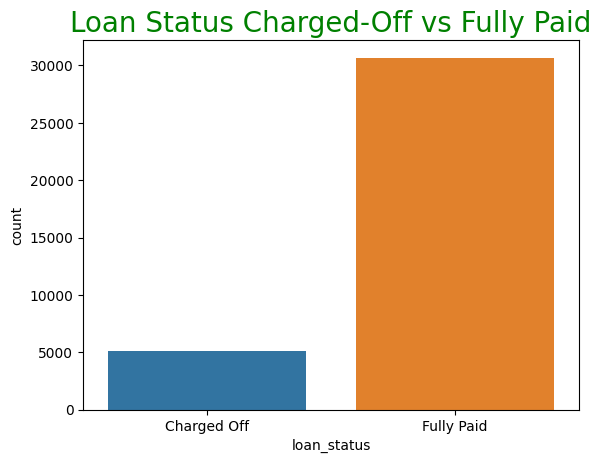

In [56]:
# Countplot for 'loan_status' to show the number of people in fully paid vs charged off

sns.countplot(x = loan_data["loan_status"])
plt.title("Loan Status Charged-Off vs Fully Paid", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

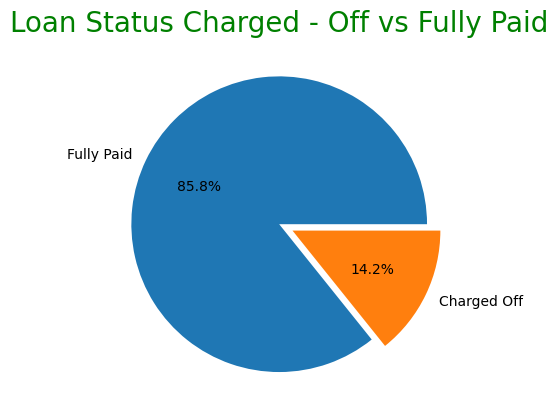

In [57]:
# Plotting the loan_status catogory in a pie plot and viewing the percentage of its share.
explode = (0, .1) 
plt.pie(loan_data['loan_status'].value_counts() , autopct='%1.1f%%',labels = loan_data['loan_status'].unique()[::-1] ,explode=explode )
plt.title("Loan Status Charged - Off vs Fully Paid", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

In [58]:
#Charged off vs Fully Paid percentage

print( "Fully Paid Percentage:", round(len(loan_data[loan_data['loan_status']=='Fully Paid']) / len(loan_data['loan_status'])*100,2))
print( "Charged Off Percentage:", round(len(loan_data[loan_data['loan_status']=='Charged Off']) / len(loan_data['loan_status'])*100,2))

Fully Paid Percentage: 85.76
Charged Off Percentage: 14.24


In [59]:
loan_data['loan_status'].value_counts()

Fully Paid     30686
Charged Off     5095
Name: loan_status, dtype: int64

#### Observation  - 85.8% of the loans are fully paid (non-defaulters) and 14.2% of the loans are charged off (defaulters)

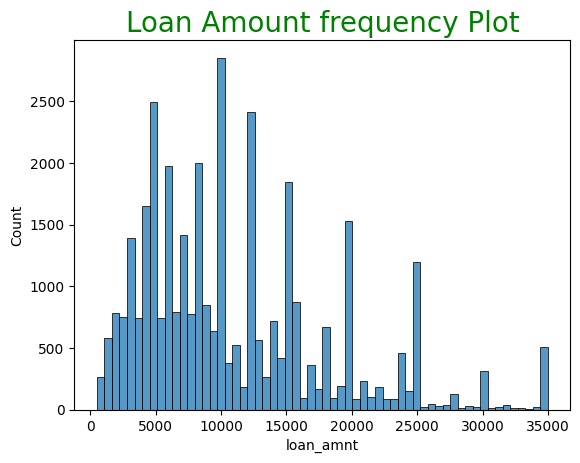

In [60]:
# Viewing the loan amount frequencies in the multiple buckets.
sns.histplot(loan_data['loan_amnt'])
plt.title("Loan Amount frequency Plot", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation - Most of the loans are issued for loan_amnt in the 5000 pool

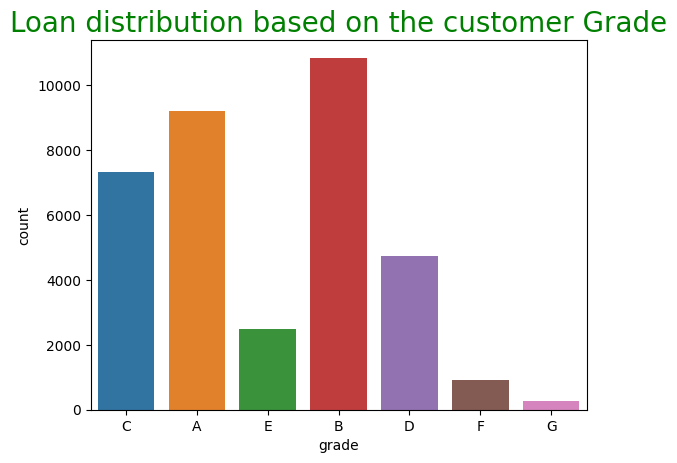

In [61]:
# Based on the Borrower's profile , lending club catogorized them in to multiple grades -
#The Adjustment for Risk & Volatility is designed to cover expected losses and provide higher risk-adjusted returns for each 
#loan grade increment from A1 to G5.

sns.countplot(x ='grade', data=loan_data)

plt.title("Loan distribution based on the customer Grade", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()


- Loan grades are assigned based on both the borrower’s credit profile and the nature of the contract. 
- 'A' grade loans represent the lowest risk while 'G' grade loans are the riskiest.
#### Observation - B and A grade loans are issued the most, while riskier grade loans like E,F,G are issued less

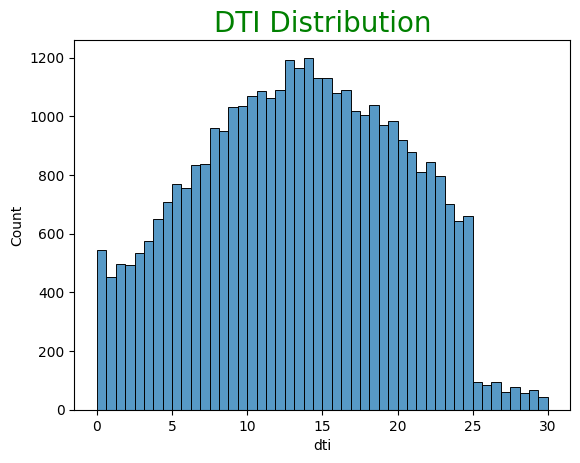

In [62]:
#debt-to-income ratio
#Your debt-to-income ratio (DTI) compares how much you owe each month to how much you earn.
sns.histplot(loan_data['dti'])
plt.title("DTI Distribution", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()


#### Observation -  'dti' (Debt To Income) is peaking at 14  to 15 range


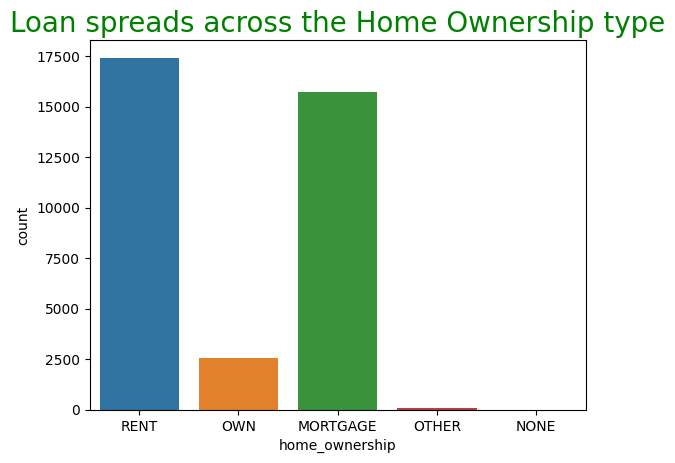

In [63]:
# Countplot for 'home_ownership'

sns.countplot(x = loan_data["home_ownership"])
plt.title("Loan spreads across the Home Ownership type", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation - Most of the loans are issued for clients who is staying at Rented House or at Mortgaged House

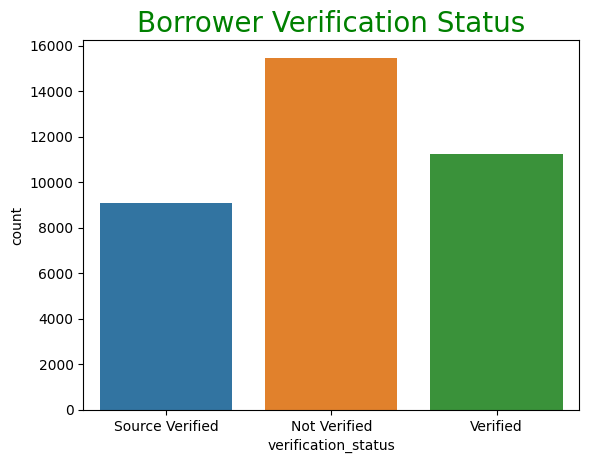

In [64]:
# Countplot for 'verification_status'
sns.countplot(x ='verification_status',data=loan_data)
plt.title("Borrower Verification Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()


#### Observation  - 3 categories of Verification_status : 
- Source Verified - client's income verified ,
- Verified - client verified by LC , 
- Not Verified

There are scenarios where verification is not done , need to correlate it with loan_status to check any relation here.
This will be done under Bivariate analysis


## 2. Segmented Univariate Analysis
- Segmented Univariate Analysis is a statistical method that involves dividing a dataset into multiple segments or subgroups based on a certain criteria and then analyzing each segment separately to understand the underlying patterns and trends

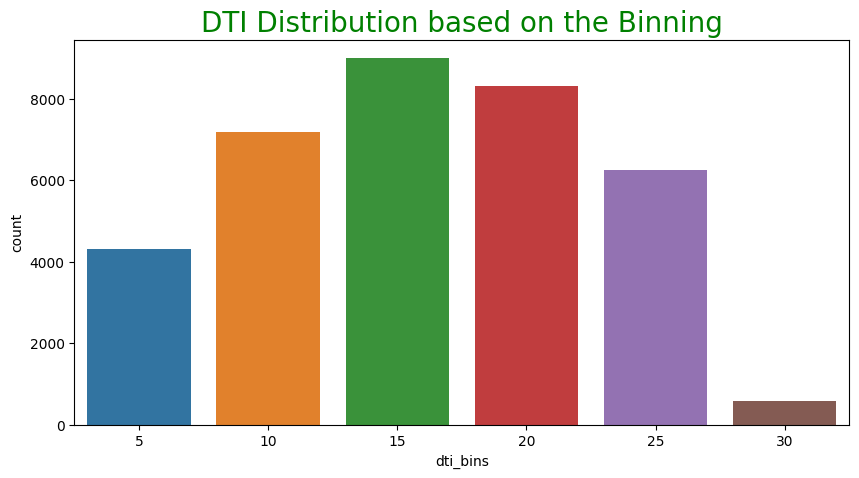

In [66]:
sns.countplot(x=loan_data['dti_bins'])
fig = plt.gcf()
fig.set_size_inches(10,5 )
plt.title("DTI Distribution based on the Binning", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation -  'dti' (Debt To Income) is peaking from 10  max at 15 , then slowly down towards 20 range


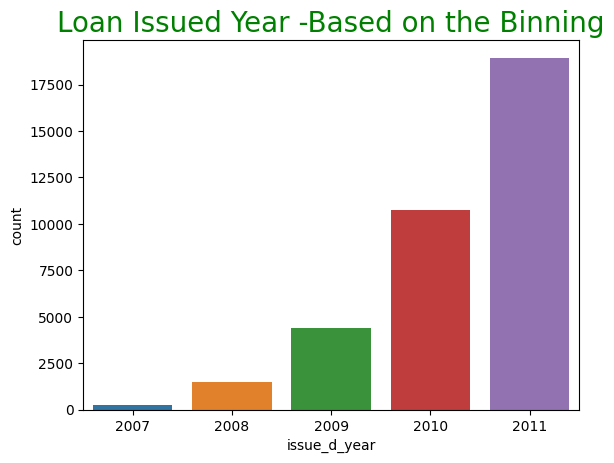

In [67]:
sns.countplot(x=loan_data['issue_d_year'])
plt.title("Loan Issued Year -Based on the Binning", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

### Observation:
More Loans are issued in the year of 2011
As year increased ,  number of loans issued also increased -  linear relation


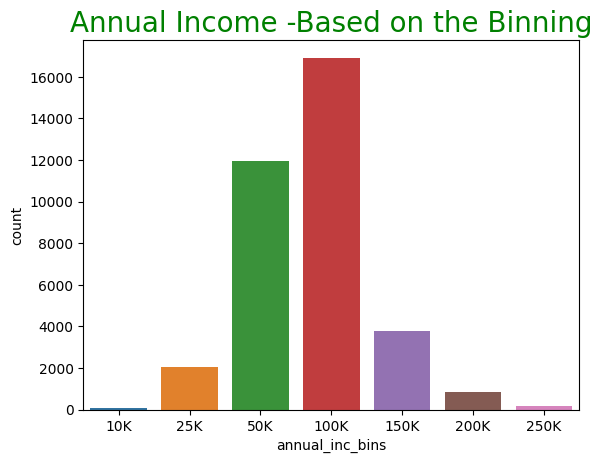

In [68]:
sns.countplot(x=loan_data['annual_inc_bins'])
plt.title("Annual Income -Based on the Binning", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

### Observation:
Majority of the people fall under 50K to 100K salary bracket


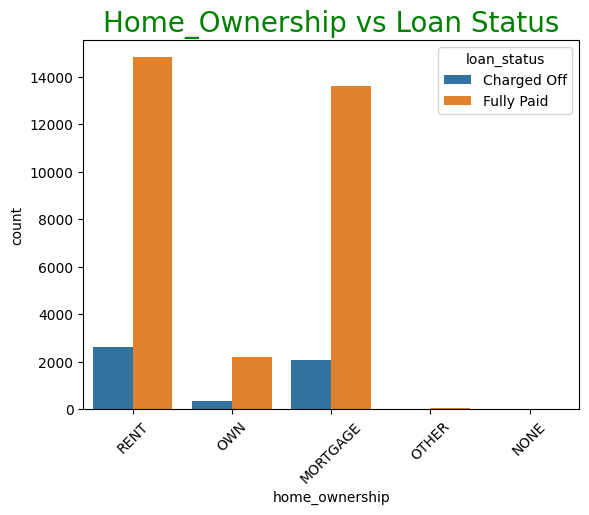

In [69]:
# Grouping by 'home_ownership' category and analysing how many clients fully paid or charged off for each category

sns.countplot(x='home_ownership',hue='loan_status', data=loan_data)
plt.xticks(rotation=45)
plt.title("Home_Ownership vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation - Charged Off loans are relatively lower for clients those who own the house compared to other categories

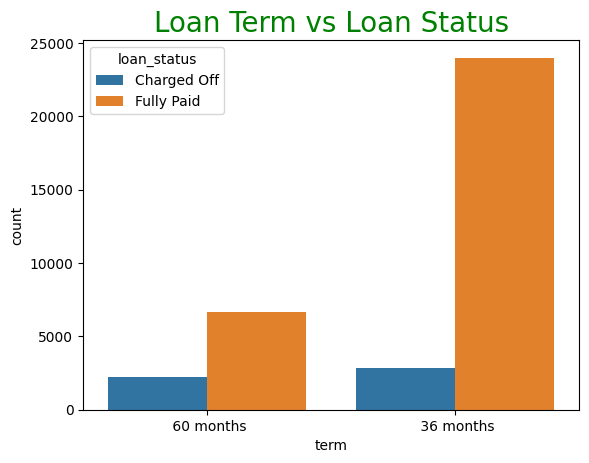

In [70]:
sns.countplot(x='term', hue='loan_status',data=loan_data)
plt.title("Loan Term vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

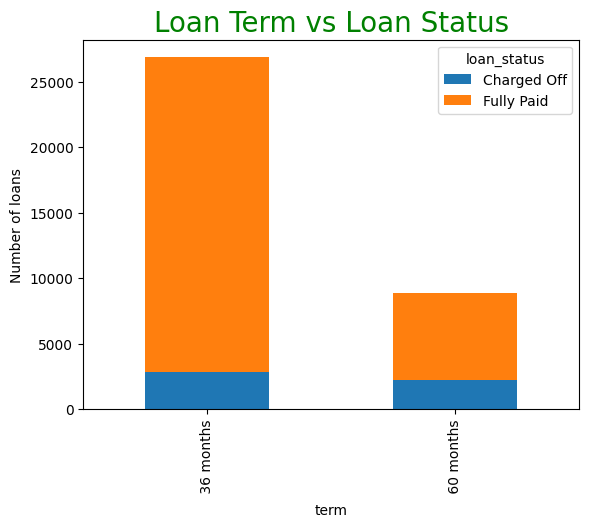

In [71]:
loan_data.groupby('term')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True,ylabel = 'Number of loans')
plt.title("Loan Term vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation - Close to 70% of the loans were for 36months and remaining are for 60months


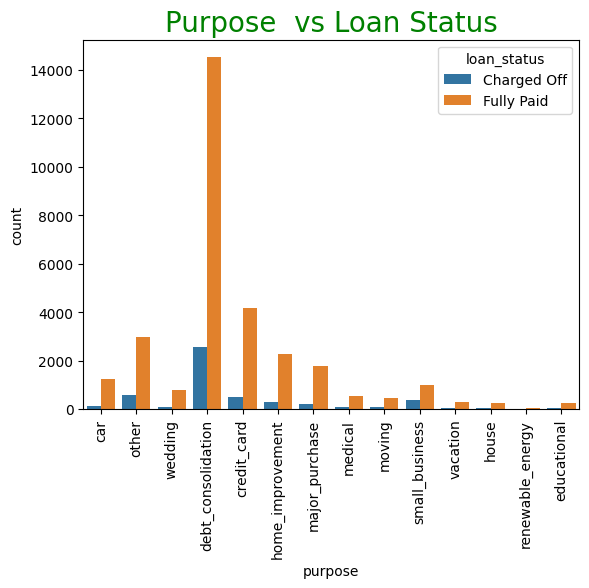

In [72]:
# Grouping by 'purpose' category and analysing how many clients fully paid or charged off for each purpose of loan

sns.countplot(x='purpose', hue="loan_status", data=loan_data)
plt.xticks(rotation=90)
plt.title("Purpose  vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observations
- Most of the fully paid clients have opted loan for 'debt_consolidation' purpose
- Charged off loans are also higher for 'debt_consolidation' purpose compared to other purposes of loan
- Most of the loans are issued for 'debt_consolidation' purpose
- Also there are clients taken loan for the credit card payment and some are not able to clear it

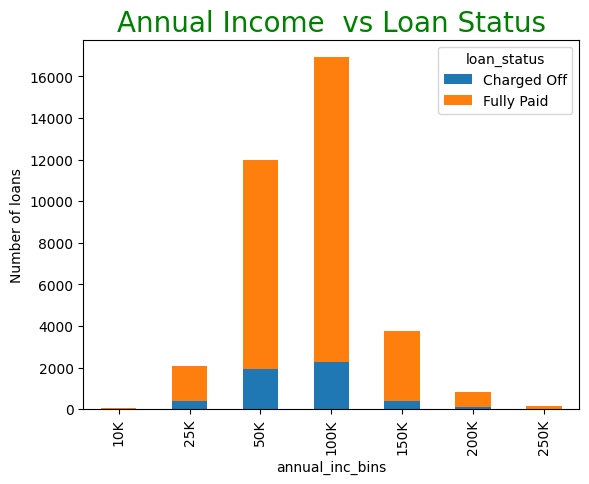

In [73]:
# Grouping by 'annual_inc_bins' and analysing how many clients fully paid or Charged Off for each bin

loan_data.groupby('annual_inc_bins')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True,ylabel = 'Number of loans')
plt.xticks(rotation=90)
plt.title("Annual Income  vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

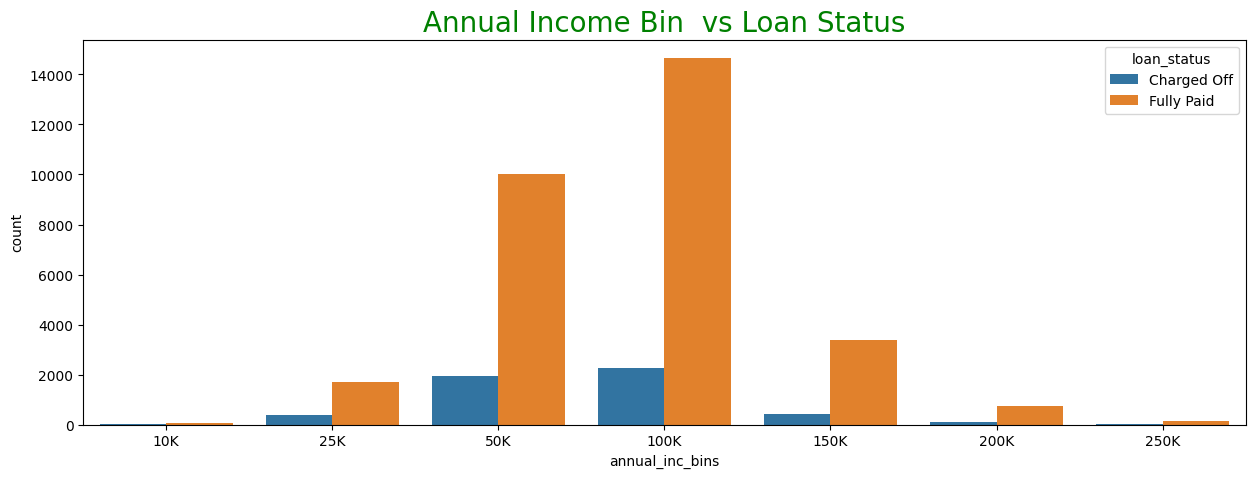

In [74]:
sns.countplot(x='annual_inc_bins',hue='loan_status',data=loan_data)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.title("Annual Income Bin  vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation
- People with annual_inc < 100000 are applied for more loans 
- Out of that 20-25% of the people were defaulters
- People with salary > 10000 , taking less number of loans and majority fully paid the amount

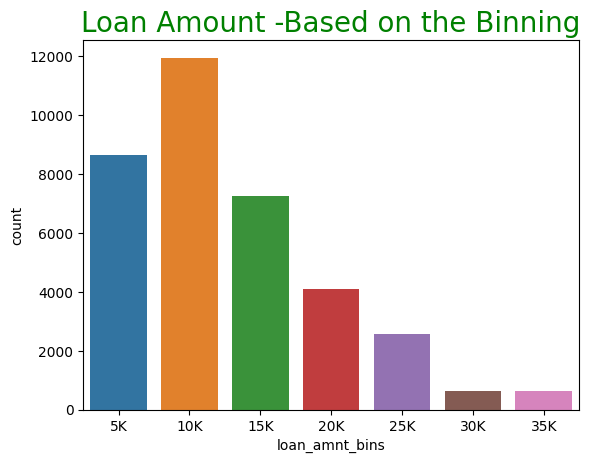

In [75]:
sns.countplot(x=loan_data['loan_amnt_bins'])

plt.title("Loan Amount -Based on the Binning", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation 
- Most of the loans are issued for loan_amnt - 5000 -10000 range
- People were taking the loan for debit consolidation/credit card clearance - so the loan amount is less

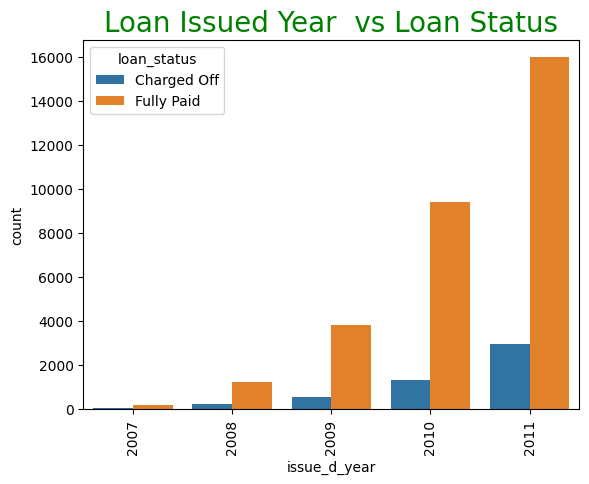

In [76]:
# find the patterns across loan issued year vs the loan status

sns.countplot(x='issue_d_year',hue='loan_status', data=loan_data)
plt.xticks(rotation=90)
plt.title("Loan Issued Year  vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()


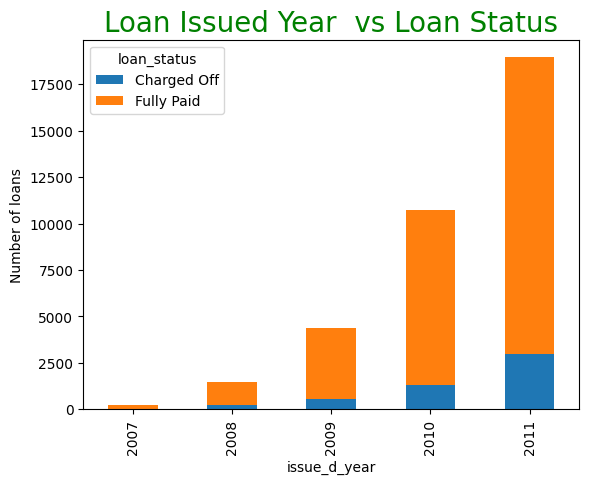

In [77]:
loan_data.groupby('issue_d_year')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True,ylabel = 'Number of loans')
plt.title("Loan Issued Year  vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()


#### Observation 
- The number Charged Off and Fully Paid loans have linear growth over the years 2007 - 2011
- most of the loans are issued in the year of 2011
- There was an econmic recession in US @ 2011 , may be this can be one of the reason for more defaulters in that time frame


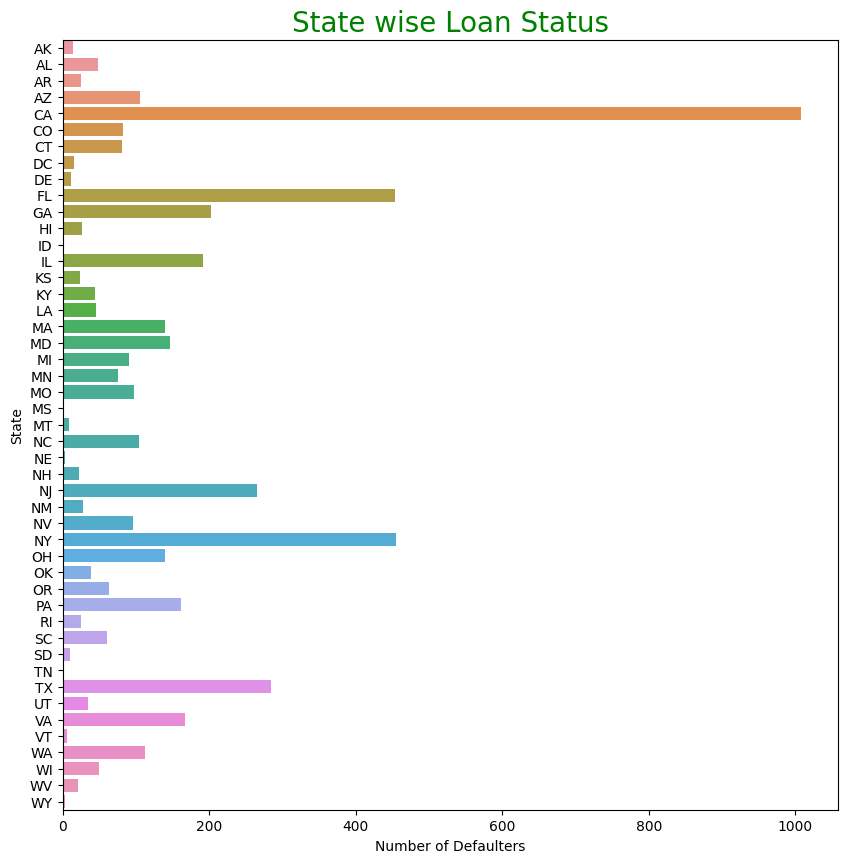

In [78]:

loan_state_state_wise = loan_data[loan_data['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=loan_state_state_wise)
plt.xlabel('Number of Defaulters')
plt.ylabel('State')
plt.title("State wise Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation
- More defaulters are from the state 'CA'
- second defaulters are from Florida and New York

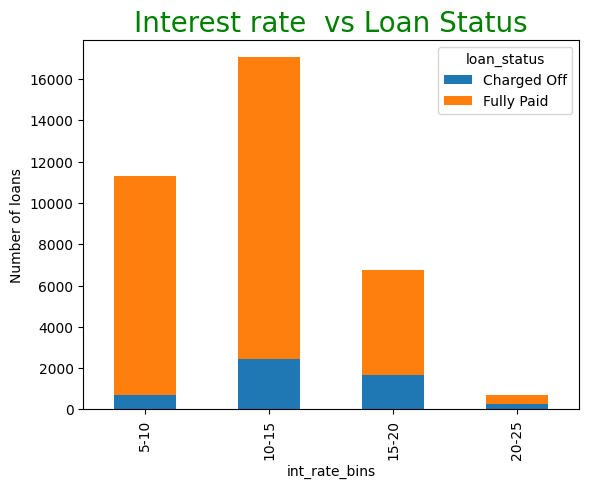

In [79]:
# Grouping by int_rate_bins and analysing how many clients fully paid or charged off for each bin

loan_data.groupby('int_rate_bins')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True,ylabel = 'Number of loans')
plt.xticks(rotation=90)
plt.title("Interest rate  vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()


#### Observation
- If the interest rate is lower, the loans are likely to be fully paid
- majority of the people took loan at the interest rate of 10-15% , out of which close to 15% are defaulters
- with the increase of interest rate, more chances of defaulters

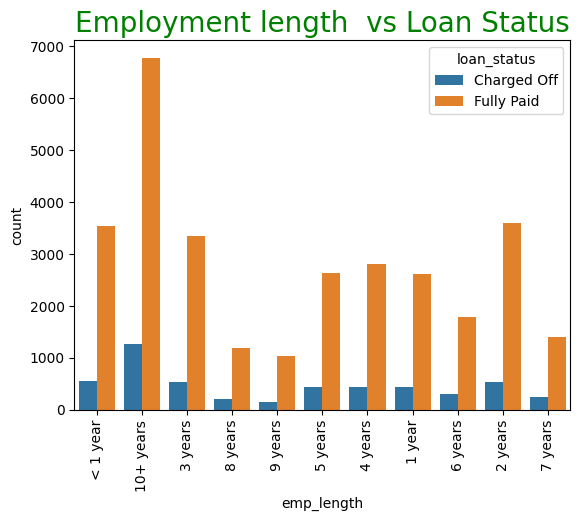

In [80]:
# Grouping by 'emp_length' and analysing how many clients fully paid or charged off for each category

sns.countplot(x ='emp_length', hue="loan_status", data=loan_data)
plt.xticks(rotation=90)
plt.title("Employment length  vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation
- Employees with 10+ years tend to charge off more than other employees
- less than 10 year employment length , each catgory showing same share in charged off

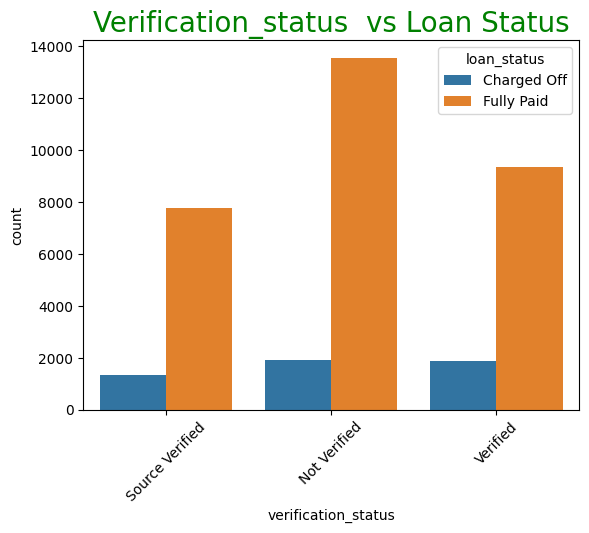

In [81]:
# Grouping by 'verification_status' and analysing how many clients fully paid or charged off for each category

sns.countplot(x ='verification_status', hue="loan_status", data=loan_data)
plt.xticks(rotation=45)
plt.title("Verification_status  vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation
- Applicant with 'Source Verified' showing very likely to default compared to others
- So its an eye opener - Verifying the Source of the applicant can reduce the defaulter case.

### Looking for the relation between requested loan amount vs approved loan amount
The loan_amnt is the amount applied by potential borrowers, funded_amnt is the amount recommended/approved by Lending Club, and the funded_amnt_inv is the amount funded by investors. 


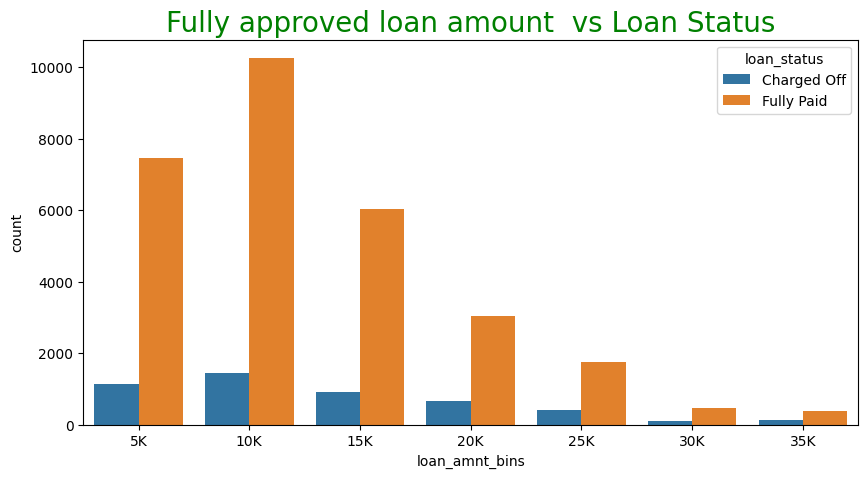

In [82]:
#loan_amnt_funded = loan_data[['loan_amnt','funded_amnt','funded_amnt_inv']].reset_index()
loan_amnt_funded = loan_data[loan_data['loan_amnt'] == loan_data['funded_amnt']].reset_index()
loan_amnt_funded['loan_amnt_bins'] = pd.cut(x=loan_amnt_funded['loan_amnt'], bins=[0,5000,10000,15000,20000,25000,30000,35000],labels=['5K','10K','15K','20K','25K','30K','35K'])
sns.countplot(x ='loan_amnt_bins', hue="loan_status", data=loan_amnt_funded)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.title("Fully approved loan amount  vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()


#### Observation from fully approved loan amount against requested amount
- 5000  to 15000 catogory people tend to default more
- if the amount is greater than 30000 , then less chances of dfaulting it


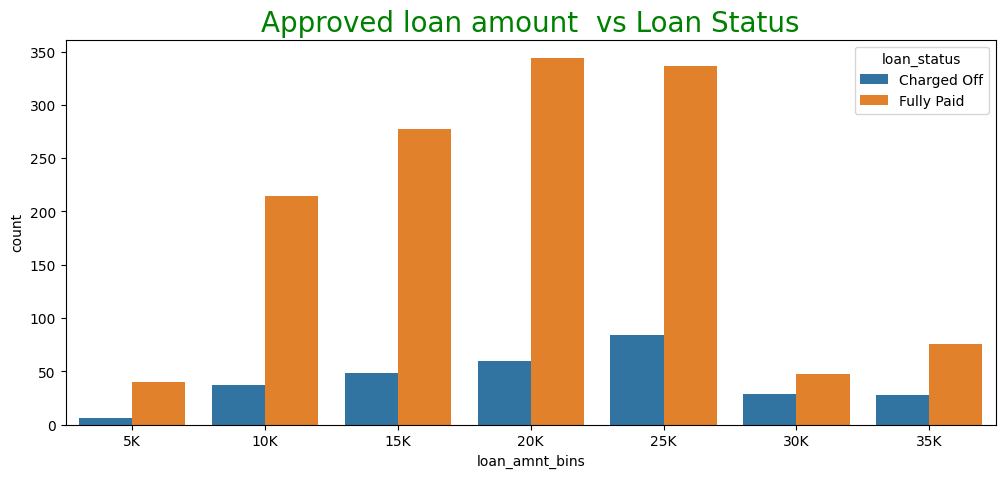

In [83]:
#loan_amnt_funded = loan_data[['loan_amnt','funded_amnt','funded_amnt_inv']].reset_index()
loan_amnt_funded_no = loan_data[loan_data['loan_amnt'] > loan_data['funded_amnt']].reset_index()
loan_amnt_funded_no['loan_amnt_bins'] = pd.cut(x=loan_amnt_funded_no['loan_amnt'], bins=[0,5000,10000,15000,20000,25000,30000,35000],labels=['5K','10K','15K','20K','25K','30K','35K'])
sns.countplot(x ='loan_amnt_bins', hue="loan_status", data=loan_amnt_funded_no)
fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.title("Approved loan amount  vs Loan Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation from approved loan amount against requested amount and if the approved amount is less the requested.
- 15000  to 25000 catogory people tend to default more
- if the amount is greater than 5000 , then less chances of dfaulting it

## 3. Bivariate Analysis
Bivariate analysis is a statistical method used to examine the relationship between two variables. It involves analyzing the relationship between two variables by using techniques such as scatter plots, correlation coefficients, and regression analysis. The goal of bivariate analysis is to determine if there is a significant relationship between two variables, and if so, to determine the strength and direction of that relationship

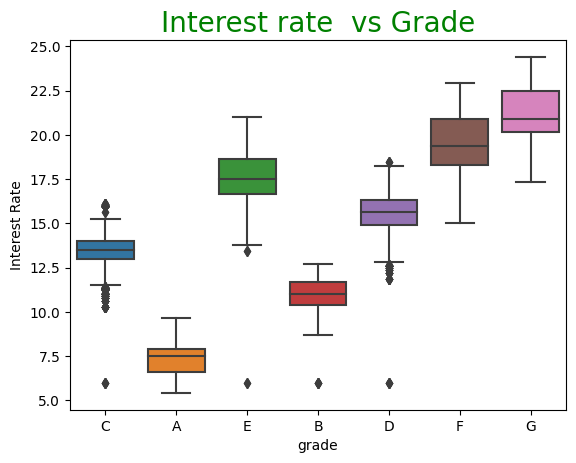

In [84]:
# Analysing interest rates across various grades of loan using boxplots

sns.boxplot(y='int_rate', x='grade', data=loan_data)
plt.ylabel('Interest Rate')
plt.title("Interest rate  vs Grade", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation
- As the grades A,B,C,D,E,F,G are categorized from low to high risk,the interest rate increases as the risk increases
- Good candidates are Applicant with 'A' category with less interests are tend to clear the loan


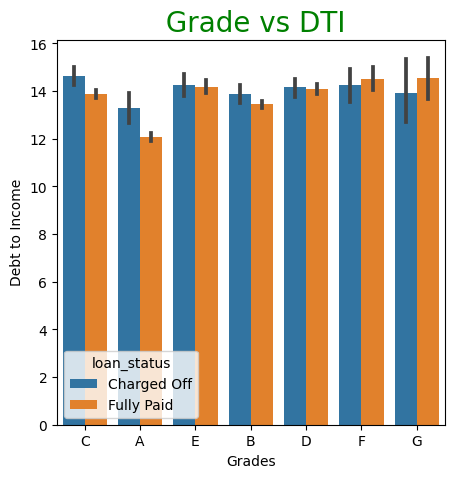

In [85]:
# Analysing grades of loans with their dti values and corresponding loan_status

plt.figure(figsize=(5,5))

sns.barplot(x='grade',y='dti',hue='loan_status',data = loan_data)
plt.xlabel('Grades')
plt.ylabel('Debt to Income')
plt.title(" Grade vs DTI", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation
- Fully paid - grade A loans have the lowest debt_to_income values

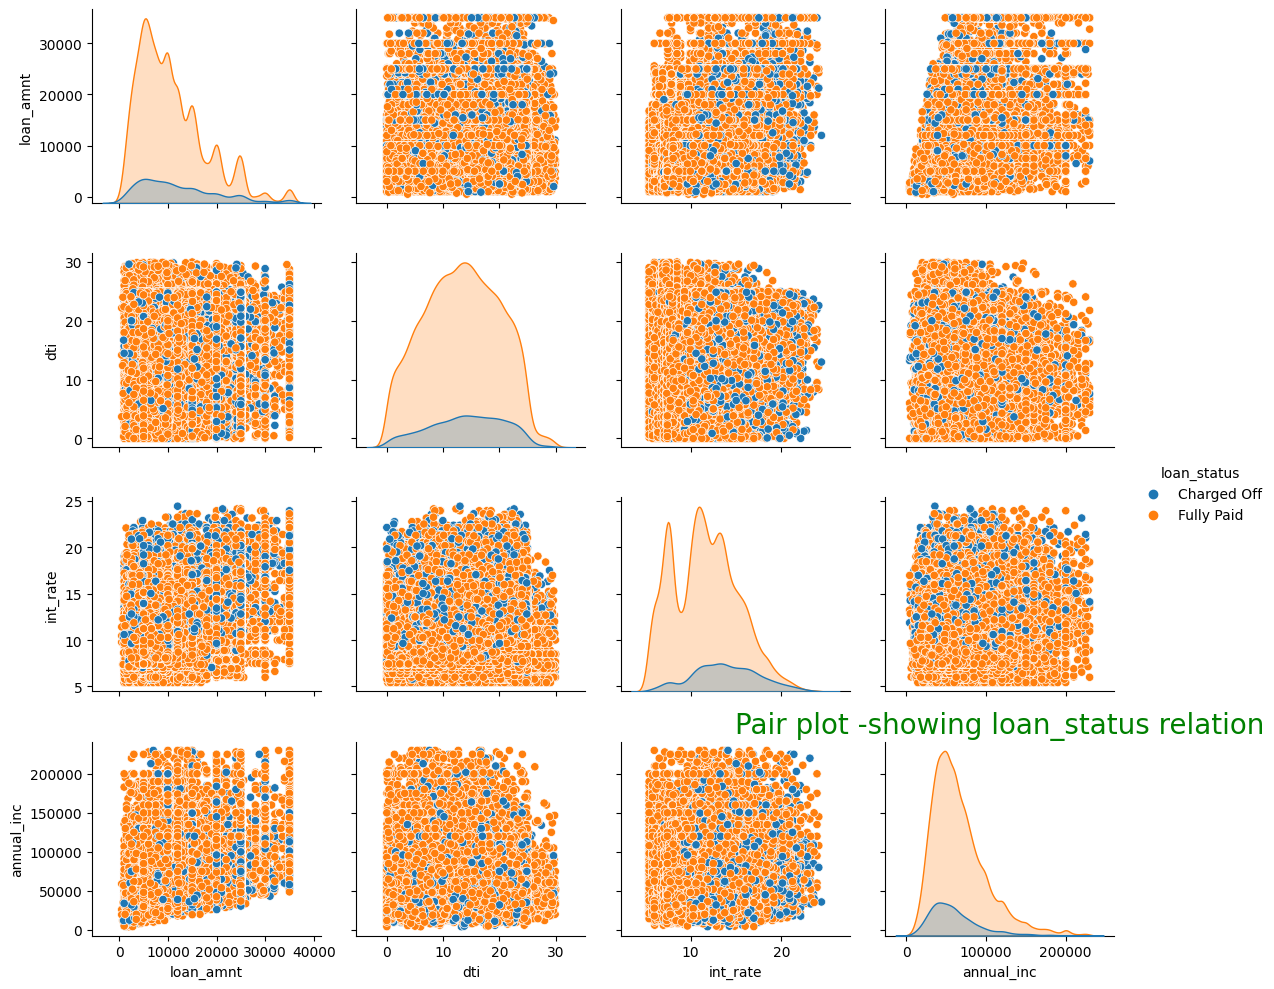

In [86]:
loan_data1 = loan_data[['loan_status','loan_amnt','dti','int_rate','emp_length','annual_inc']]
sns.pairplot(loan_data1,hue='loan_status')
#sns.pairplot(loan_data,hue='loan_status')
plt.title("Pair plot -showing loan_status relation", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.tight_layout()
plt.show()

### Observation
- Interest rate and the dti are the key factors for the defaulers
- when the loan amount and interest rates are high , people tend to default

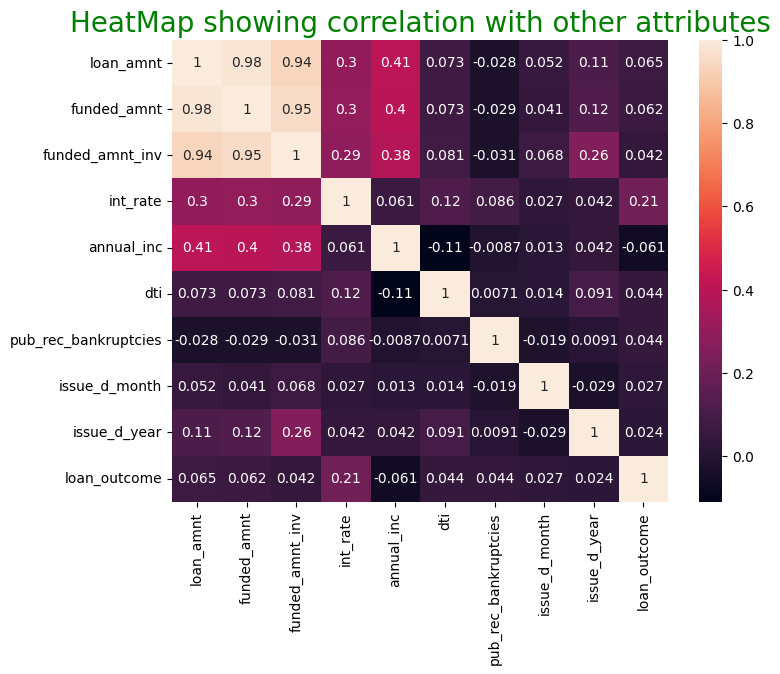

In [87]:
# Analysing correlation of continous variables in the 'loan_df' dataframe using heatmap

plt.figure(figsize=(8,6))
sns.heatmap(loan_data.corr(),annot=True)
plt.title("HeatMap showing correlation with other attributes",fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observations  from heatmap
- Loan_amnt and annual_inc are slightly correlated
- Int_rate and loan_amnt are slightly correlated
- loan amount , funded_amnt,funded_amnt_inv  are highly correleated 

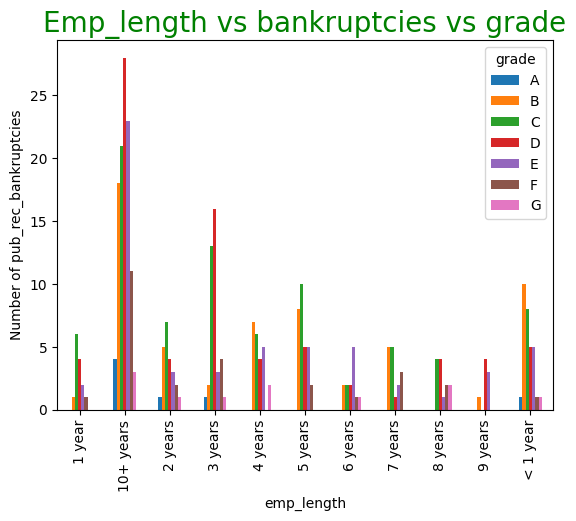

In [88]:
# Grouping by emp_length and grade for Charged Off clients to analyse pub_rec_bankruptcies

loan_data[loan_data['loan_status']=='Charged Off'].groupby(['emp_length','grade'])['pub_rec_bankruptcies'].sum().unstack().plot(kind='bar',ylabel='Number of pub_rec_bankruptcies')
plt.title("Emp_length vs bankruptcies vs grade",fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observation 
- Many bankruptcies tend to occur with Charged Off clients having 10+ years working experience and mostly they are of D-grade loans

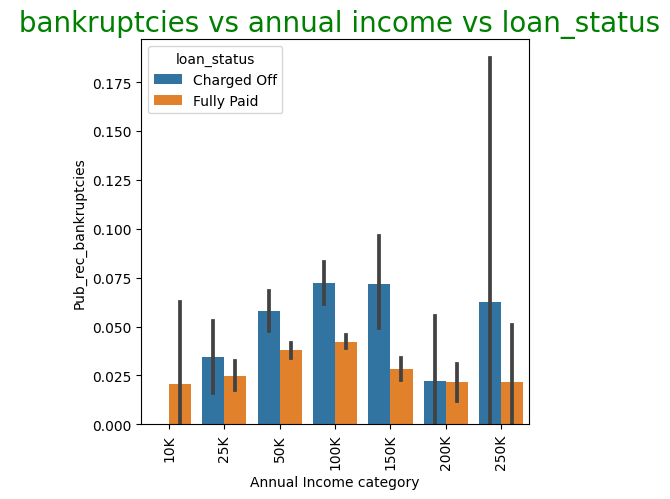

In [89]:
# Analysing annual_inc_category with their pub_rec_bankruptcies and corresponding loan_status

plt.figure(figsize=(5,5))
sns.barplot(x='annual_inc_bins',y='pub_rec_bankruptcies',hue='loan_status',data = loan_data)
plt.xlabel('Annual Income category')
plt.ylabel('Pub_rec_bankruptcies')
plt.xticks(rotation=90)
plt.title(" bankruptcies vs annual income vs loan_status",fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()


#### Observations 
- There are no Charged Off loans for annual income <10000
- Clients with pub_rec_bankruptcies tend to get charged off

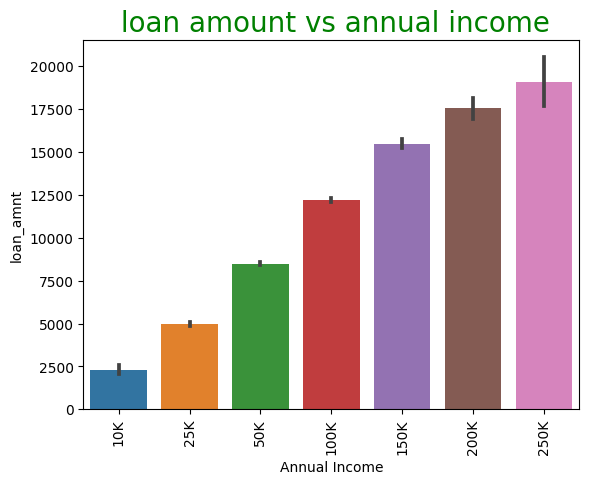

In [90]:
# Analysing relationship between loan_amnt and annual_income buckets using barplot

sns.barplot(y ='loan_amnt', x ='annual_inc_bins', data = loan_data)
plt.ylabel('loan_amnt')
plt.xlabel('Annual Income')
plt.xticks(rotation=90)
plt.title(" loan amount vs annual income",fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observations
- As annual income increases, loan amount also increases (shows positive correlation)

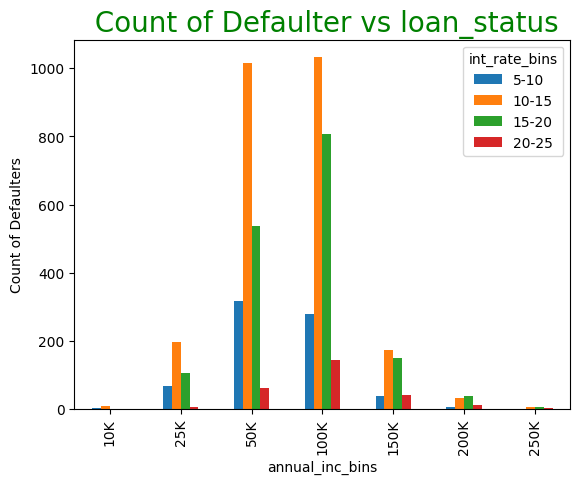

In [91]:
# Grouping by annual_inc_category and number of defaulters to analyse number of defaulters in each category

loan_data[loan_data['loan_status']=='Charged Off'].groupby(['annual_inc_bins','int_rate_bins'])['loan_status'].count().unstack().plot(kind='bar', ylabel='Count of Defaulters')
plt.title(" Count of Defaulter vs loan_status",fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observations
- Many defaulters tend to have[50000-100000] annual income and most probably the interest rates of these loans fall under [10%-15%] category

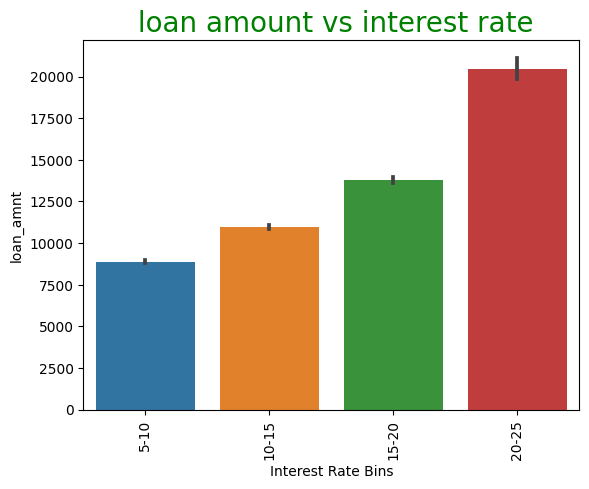

In [92]:
# Analysing relationship between loan_amnt and int_rate buckets using barplot

sns.barplot(y ='loan_amnt', x ='int_rate_bins', data = loan_data)
plt.ylabel('loan_amnt')
plt.xlabel('Interest Rate Bins')
plt.xticks(rotation=90)
plt.title(" loan amount vs interest rate",fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observations -
- As loan_amount increases, interest rate also increases (shows positive correlation)

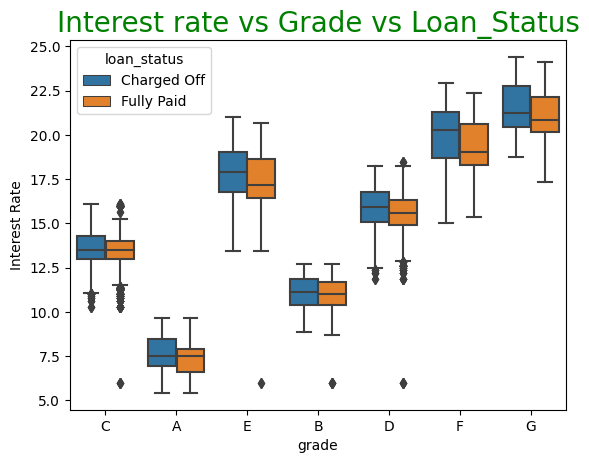

In [93]:
# Analysing interest rates across various grades of loan using boxplots using Loan_Status

sns.boxplot(y='int_rate', x='grade',hue='loan_status' ,data=loan_data)
plt.ylabel('Interest Rate')
plt.title("Interest rate vs Grade vs Loan_Status", fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Green'})
plt.show()

#### Observations -
- As loan_amount increases, interest rate also increases (shows positive correlation)
- Above category 'C' , more likely to default. This can be due their profile plus and higher interest rate

# Summary of the analysis and key take-aways

> #  Observation from the Univariate analysis

- Based on the sample data , 85.8% of the loans are fully paid (non-defaulters) and 14.2% of the loans are charged off (defaulters)
- Most of the loans are issued for loan_amnt - 5000 to 10000 range (10k Bin)
- Majority of the loans are issued against the applicant profile with B and A and very less towards other catogory like C,D,E,F,G
- The frequency of 'dti' (Debt To Income) is high around 14 to 15 range, which means most of the issued loans have debt to income ratio around 15
- 70% loans are issued for '36 months' and 30% loans are issued for '60 months'
- Most of the loans are issued for clients who's home ownership type 'RENT' or 'MORTGAGE'
- Majority of the loan issued for the people whose background verification done correctly either at Source or with available data
- More people took loan for the 'debt_consolidation' and credit card payment

># Observation from the Segmented Univariate analysis
- Charged Off loans are less for the clients those who own the House compared to other categories of home ownership
- Most of the people took loan for the 'debt_consolidation' purpose and credit card payment
- The people who took loan for debt_consolidation shows more default, compared to other cases
- Mean of debt_to_income (DTI) increases linearly across the splitted debt_to_income buckets / bins
- Clients having annual_inc > 100000  are likely to pay the loan fully
- Employees with 10+ years tend to get charged off more than other employees
- The number of Charged Off and Fully Paid loans have linear growth over the years 2007 - 2011
- More defaulters are from the state 'CA'
- Most of the issued loans have 'dti' values populated around 14 to 15
- If the interest rate is lower, the loans are likely to be fully paid
- The number of issued-loans linearly increase across the years 2007 - 2011

># Observation from the Bivariate analysis
- Grades A,B,C,D,E,F,G are categorised from low to high risk,the interest rate increases as the risk increases
- Majority of the loans issued to the people with Grade B and A
- Fully paid - grade A loans have the lowest debt_to_income values
- Income and Loan amount showing the positive correlation same with the interest rate
- Majorify of the Charged Off clients having 10+ years working experience and mostly they are of D-grade loans
- Charged Off clients tend to have higher interest rates compared to Fully paid clients
- Annual income of fully paid clients is slightly higher than that of Charged Off clients
- There are no Charged Off loans for annual income <10000
- Clients with pub_rec_bankruptcies tend to get charged off
- High interest rate,higher Grade level(> B) tend to default more compared to others

> ## 4. Key insights from the analysis

#### -  Key attributes which  deciding whether a loan applicant tend to default or not :
        - Annual Income
        - Verification Status
        - Grades
        - Interest rates 
        - DTI
        - Pub_rec_bankruptcies
#### - Additional points  to consider while approving the loan
        - Verification of documents / Source
        - Income in the range 50000-100000 are tend to default
        - with past pub_rec_bankruptcies 
        - Grades above D grade( E,F,G ) are tend to default
        - Clients from 'CA' state showing defaulter nature
        
   